In [1]:
import os
import glob
import pickle
import sys  

sys.path.insert(0, '../py')
from graviti import *

import numpy as np
import pandas as pd

from  matplotlib import pyplot
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import seaborn

import umap

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_wo = pd.read_pickle('../data/BRCA_covds_wo_intensity.umap.pkl')
df_wo.rename(columns={"x": "x_wo", "y": "y_wo"},inplace=True)
df_with = pd.read_pickle('../data/BRCA_covds_with_intensity.umap.pkl')
df_with.rename(columns={"x": "x_with", "y": "y_with"},inplace=True)

In [3]:
df_wo.head()

,x_wo,y_wo,sample
0,-1.573889,1.407486,TCGA-D8-A1XD-01Z-00-DX1
1,2.531950,-4.290890,TCGA-A8-A06N-01Z-00-DX1
2,-0.087363,2.902612,TCGA-E2-A15J-01Z-00-DX1
3,3.391219,-0.079044,TCGA-BH-A0W4-01Z-00-DX1
4,-0.003620,-1.560097,TCGA-A8-A06X-01Z-00-DX1


In [4]:
df_with.head()

,x_with,y_with,sample
0,-3.514395,2.161275,TCGA-D8-A1XD-01Z-00-DX1
1,-5.174072,-0.959072,TCGA-A8-A06N-01Z-00-DX1
2,-0.244232,0.497632,TCGA-E2-A15J-01Z-00-DX1
3,1.847562,2.340817,TCGA-BH-A0W4-01Z-00-DX1
4,-4.933273,-1.678683,TCGA-A8-A06X-01Z-00-DX1


In [5]:
# K-means classification
from sklearn.cluster import KMeans
X = df_wo[['x_wo','y_wo']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

#Split dataset according to cluster labels
df_wo['cluster'] = kmeans.labels_
df_wo.head()

,x_wo,y_wo,sample,cluster
0,-1.573889,1.407486,TCGA-D8-A1XD-01Z-00-DX1,0
1,2.531950,-4.290890,TCGA-A8-A06N-01Z-00-DX1,0
2,-0.087363,2.902612,TCGA-E2-A15J-01Z-00-DX1,0
3,3.391219,-0.079044,TCGA-BH-A0W4-01Z-00-DX1,0
4,-0.003620,-1.560097,TCGA-A8-A06X-01Z-00-DX1,0


In [13]:
print(df_with.shape, df_wo.shape)
df = pd.merge(df_with, df_wo, on="sample")
print(df.shape)
df.head()

(1088, 3) (1096, 4)
(1098, 6)


,x_with,y_with,sample,x_wo,y_wo,cluster
0,-3.514395,2.161275,TCGA-D8-A1XD-01Z-00-DX1,-1.573889,1.407486,0
1,-5.174072,-0.959072,TCGA-A8-A06N-01Z-00-DX1,2.531950,-4.290890,0
2,-0.244232,0.497632,TCGA-E2-A15J-01Z-00-DX1,-0.087363,2.902612,0
3,1.847562,2.340817,TCGA-BH-A0W4-01Z-00-DX1,3.391219,-0.079044,0
4,-4.933273,-1.678683,TCGA-A8-A06X-01Z-00-DX1,-0.003620,-1.560097,0


In [24]:
#print(len(df_with['sample'].to_list()),len(set(df_with['sample'].to_list())))
df[df['cluster']==1]

,x_with,y_with,sample,x_wo,y_wo,cluster
45,4.238231,0.102669,TCGA-AO-A1KR-01Z-00-DX1,16.880144,0.688947,1
56,-4.134295,0.233590,TCGA-MS-A51U-01Z-00-DX1,16.698399,0.518711,1
70,-2.578992,0.168727,TCGA-AC-A3W6-01Z-00-DX1,16.833347,0.646612,1
109,-1.705224,0.428861,TCGA-AO-A1KT-01Z-00-DX1,16.843035,0.656134,1
146,4.235178,0.088776,TCGA-AO-A1KQ-01Z-00-DX1,16.967806,0.772751,1
162,1.974718,-0.760975,TCGA-AO-A0J3-01Z-00-DX1,17.150547,0.950354,1
187,-2.417266,0.062685,TCGA-AO-A12H-01Z-00-DX1,17.136717,0.935842,1
218,-2.501186,0.157210,TCGA-HN-A2NL-01Z-00-DX1,17.040543,0.843675,1
233,4.281191,0.147857,TCGA-AO-A1KO-01Z-00-DX1,16.945433,0.752102,1
238,-2.659945,0.233764,TCGA-AO-A0J5-01Z-00-DX1,16.733994,0.551795,1


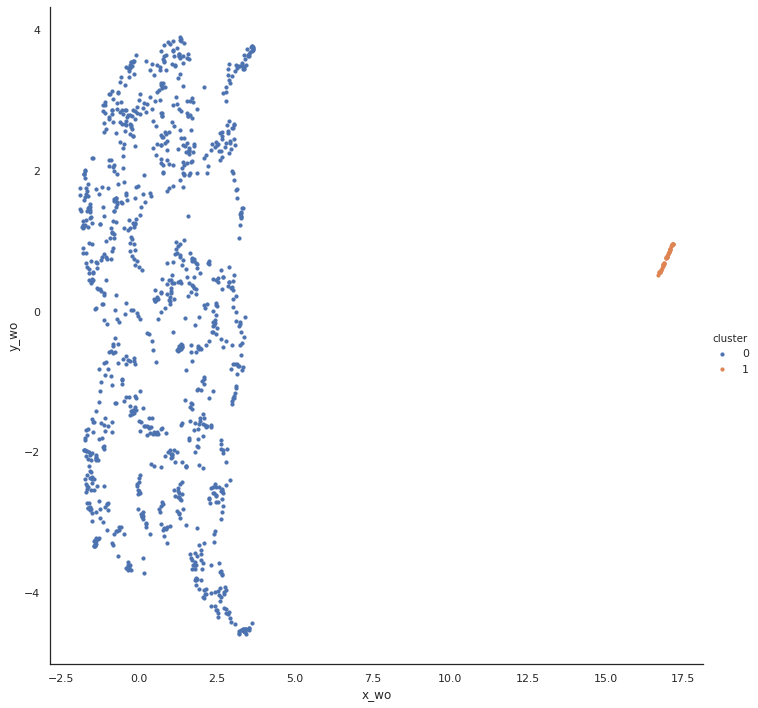

In [7]:
# Show the cluster to study
import seaborn
seaborn.set(style='white')

fg = seaborn.FacetGrid(data=df[['x_wo','y_wo','cluster']], 
                       hue='cluster',
                      height=10,
                      aspect=1)
fg.map(pyplot.scatter, 'x_wo', 'y_wo',s=10).add_legend()

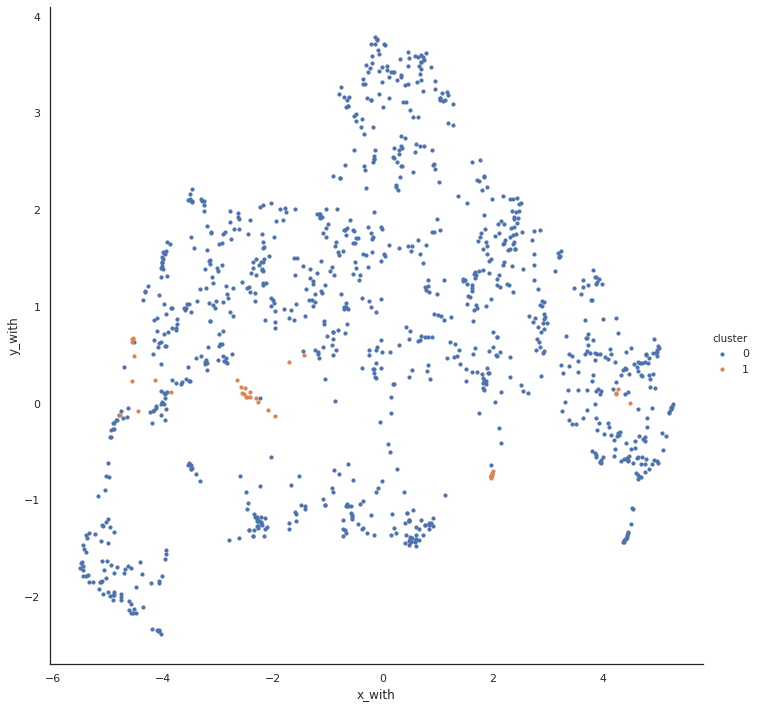

In [8]:
# Show the cluster to study
import seaborn
seaborn.set(style='white')

fg = seaborn.FacetGrid(data=df[['x_with','y_with','cluster']], 
                       hue='cluster',
                      height=10,
                      aspect=1)
fg.map(pyplot.scatter, 'x_with', 'y_with',s=10).add_legend()

In [12]:
df.shape

(1098, 6)